<a href="https://colab.research.google.com/github/GildasTaliah/Solutions_with_PyNoteBook/blob/main/Solving_ODE__Py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Differential Equation

Differential Equation (DE) is a Mathematical Equation that involves an unkown function and it's derivatives. It represent how a function changes with repsect to time or space. They are used to model real-world phenomena such as motion of an object, population dynamics, heat flow, asset price changes (process), electrical circuits etc.

They can be solved in Python with the **Scipy.integrate** package using function **odeint** or **solve_ivp**.



Solving DE with ODEINT requires three inputs:

**y = odeint(model, y0, t )**
- model: Fubction name that retuurns derivatives at requested y and t as dydt = model(y,t)
- y0: Initial condition of the differential states.
- t: Time points at which solution should be reported. Additional internal points are often calculated to maintain accuracy of the solution but are not reported.

Let us consider the following partial differential equation:

$
\begin{equation} \frac{dy(t)}{dt} = {-ky(t)}
\end{equation}$


We can solve the above using various analyltical method (such as: separate integrate, laplace transforms and others) to come up with solution presented as:


$
\begin{equation} y (t) = y_{0} e^{-kt}
\end{equation}$

Our goal in here is to solve the DE numerically and get a solution as a function of **t**, then plot.




# Example
**Example**: using ODEINT to solve the above differential equation with parameter k=0.3, with initial condition y0=5, is presented below.

In [15]:
# Import package
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


# define function
# the funtion is in the differential state
def model(y,t):
  k = 0.3
  dydt = - k * y
  return dydt

# initial condition
y0 = 5

# time points: 50 values between -1 and 20.
t = np.linspace(-1,20)
np.transpose(t)

(50,)

In [13]:
# solve ODE
y = odeint(model,y0,t)
np.transpose(y)

array([[5.        , 4.39675381, 3.86628869, 3.39982392, 2.98963772,
        2.62894018, 2.31176054, 2.0328484 , 1.78758676, 1.57191574,
        1.38226529, 1.21549601, 1.06884733, 0.93989168, 0.82649444,
        0.7267785 , 0.63909321, 0.56198708, 0.49418375, 0.43456085,
        0.3821314 , 0.33602753, 0.29548605, 0.25983588, 0.22848687,
        0.2009201 , 0.17667924, 0.15536302, 0.13661859, 0.12013566,
        0.10564139, 0.09289583, 0.08168802, 0.07183242, 0.06316589,
        0.05554498, 0.04884352, 0.04295058, 0.03776863, 0.03321187,
        0.02920489, 0.02568134, 0.0225829 , 0.01985829, 0.01746241,
        0.01535558, 0.01350294, 0.01187382, 0.01044125, 0.00918152]])

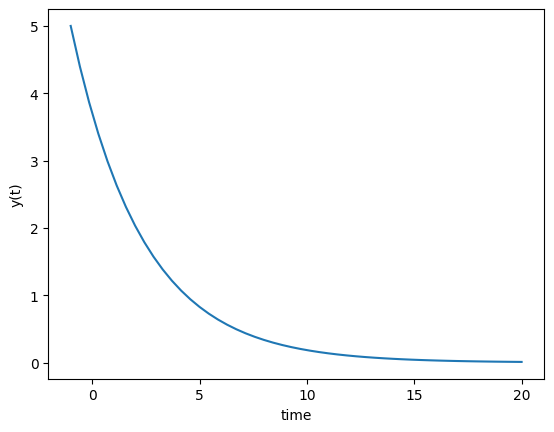

In [14]:
# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

Now let us make k part of the input paramters and see how that can be implemented in Python using ODEINT.

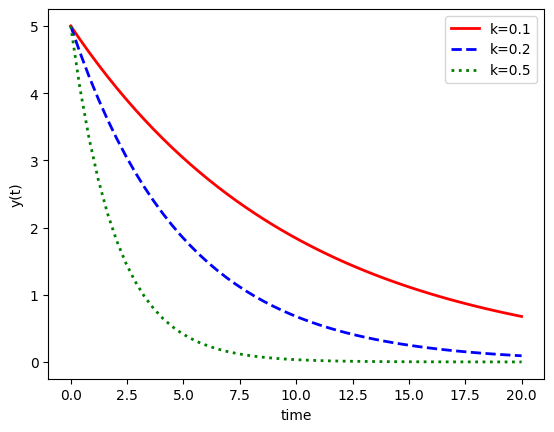

In [17]:
# function that returns dy/dt
# Essentially the function that returns the differential state
def model(y,t,k):
    dydt = -k * y
    return dydt

# initial condition
y0 = 5

# time points: this time 50 values between  0 and 20
t = np.linspace(0,20)

# solve ODEs
k = 0.1
y1 = odeint(model,y0,t,args=(k,))
k = 0.2
y2 = odeint(model,y0,t,args=(k,))
k = 0.5
y3 = odeint(model,y0,t,args=(k,))

# plot results
plt.plot(t,y1,'r-',linewidth=2,label='k=0.1')
plt.plot(t,y2,'b--',linewidth=2,label='k=0.2')
plt.plot(t,y3,'g:',linewidth=2,label='k=0.5')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()

# Exercises

**Exercise**: Below we want to numerically find the solution to the partial differential equations given the initial conditions.


We will ensure to expand the requested time horizon until the solution reaches a steady state. We proceed to show a plot of the states (x(t) and/or y(t)) reporting the final value of each state as $t \rightarrow \infty$


- Problem One:


$
\begin{equation} \frac{dy(t)}{dt} = y(t) + 1
\end{equation}$


$
\begin{equation}  
y(0) = 0
\end{equation}$



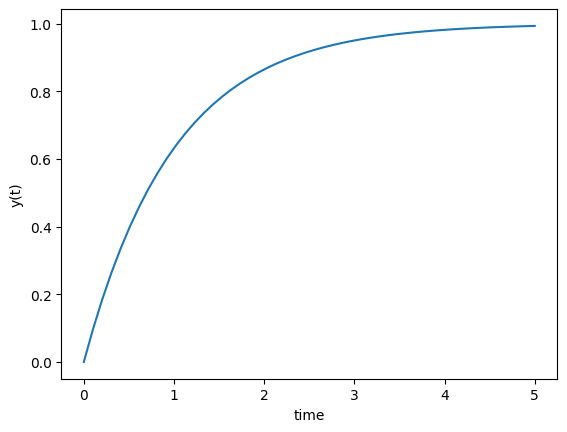

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(y,t):
    dydt = -y + 1.0
    return dydt

# initial condition
y0 = 0

# time points
t = np.linspace(0,5)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

- Problem 2


$
\begin{equation} 5 \frac{dy(t)}{dt} = - y(t) + u(t)
\end{equation}$


$
\begin{equation}  
y(0) = 1
\end{equation}$

$u$ steps from 0 to 2 at $t = 10$

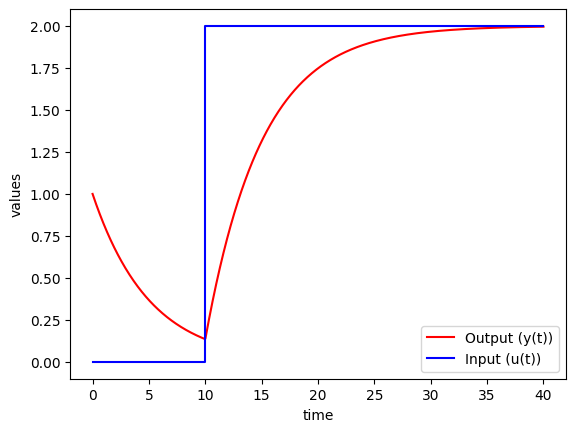

In [18]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(y,t):
    # u steps from 0 to 2 at t=10
    if t<10.0:
        u = 0
    else:
        u = 2
    dydt = (-y + u)/5.0
    return dydt

# initial condition
y0 = 1

# time points
t = np.linspace(0,40,1000)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y,'r-',label='Output (y(t))')
plt.plot([0,10,10,40],[0,0,2,2],'b-',label='Input (u(t))')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

- Problem 3: Solve for $x(t)$  and $y(t)$ and show that the solutions are equivalent.


$
\begin{equation}  \frac{dx(t)}{dt} = 3 exp(-t)   
\end{equation}$


$
\begin{equation} \frac{dy(t)}{dt} = 3 - y(t)
\end{equation}$

$\begin{equation} x(0) = 0
\end{equation}$

$\begin{equation} y(0) = 0
\end{equation}$





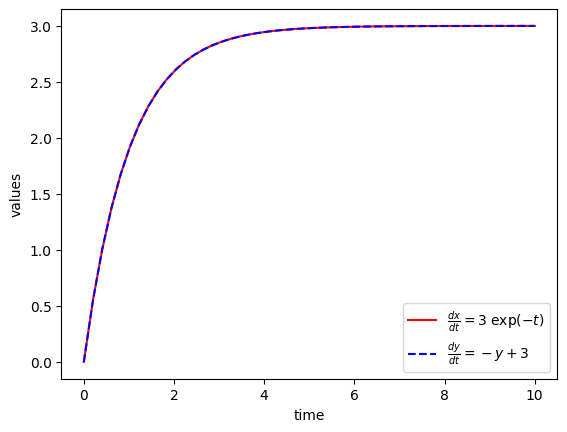

In [19]:
import numpy as np
# funtion to returb dz/dt

def model(z, t):
  dxdt = 3 * np.exp(-t)
  dydt = 3 - z[1]
  dzdt = [dxdt, dydt]
  return dzdt


# initial conditions
z0 = [0,0]

# time points
t = np.linspace(0,10)

# solve ODE
z = odeint(model,z0,t)

# plot
plt.plot(t,z[:,0],'r-', label=r'$\frac{dx}{dt}=3 \; \exp(-t)$')
plt.plot(t,z[:,1],'b--', label=r'$\frac{dy}{dt}=-y+3$')
plt.xlabel('time')
plt.ylabel('values')
plt.legend(loc='best')

- Problem 4: Solve for $x(t)$  and $y(t)$.

$
\begin{equation} 2 \frac{dx(t)}{dt} = x(t) + u(t)  
\end{equation}$

$
\begin{equation} 5 \frac{dy(t)}{dt} =  - y(t) + x(t)
\end{equation}$

$\begin{equation} u = 2 S(t-5)
\end{equation}$
$\,$
$x(0) = 0 \, ,y(0) = 0
$

Where S(t-5) is a step function that changes from 0 to 1.0 from t = 5. When it is multiplied by two it changes from 0 to 2 from t = 5.



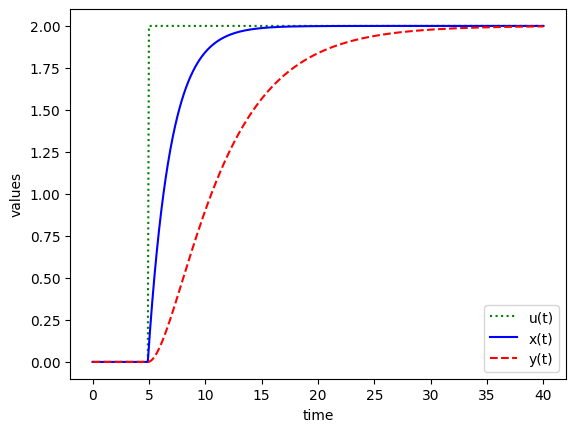

In [33]:
# function that returns dz/dt
def model(z,t,u):
    x = z[0]
    y = z[1]
    dxdt = (-x + u)/2.0
    dydt = (-y + x)/5.0
    dzdt = [dxdt,dydt]
    return dzdt

# initial conditions
z0 = [0,0]

# explicitly define the number of time points
n = 401

# time points
t = np.linspace(0, 40, n)

# step input
u = np.zeros(n)
# change to 2.0 from time t = 5.0
# recall we used 400 (40 x 10) timestamps thus time t = 5: (5 x 10) 50.0
u[50:] = 2.0

## store solution
# we use empty like ( ~ one_like, zeros_like, full_like), since it does not
# initialize the values of the array and is therefore faster!
# Also the values are arbitrary and redundant, as they would be replaced.
x = np.empty_like(t)
y = np.empty_like(t)
# record initial conditions
x[0] = z0[0]
y[0] = z0[1]

# solve ODE
for i in range(1,n):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(u[i],))
    # store solution for plotting
    x[i] = z[1][0]
    y[i] = z[1][1]
    # next initial condition
    z0 = z[1]

# plot results
plt.plot(t,u,'g:',label='u(t)')
plt.plot(t,x,'b-',label='x(t)')
plt.plot(t,y,'r--',label='y(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

In [ ]:
# The end!!

# Reference
- [Solving Differential Equation with ODEINT](https://apmonitor.com/pdc/index.php/Main/SolveDifferentialEquations)